# Transfer learning camera trapping data with NN in python

Run this notebook in colab: https://colab.research.google.com/drive/1blEyDD0GluYjEJC5N2Zz69cfAwWoCwUk?usp=sharing  




### Transfer learning

![Transfer learning](https://pennylane.ai/qml/_images/transfer_learning_general.png)

We will be using a pre-trained model to solve our problem. 
https://arxiv.org/pdf/1608.06993.pdf  

![model](https://miro.medium.com/max/352/1*O27hRq85_aK-hjVVK5i7DA.png)

### Mounting my Google drive

We have to tell our *virtual computer* where is the data we are going to be working with, so we need to give it permissions to connect to our Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/NN_WORKSHOP_DATA


1.Resize_images.ipynb		     models	  y_train.npy
2.CNN_in_Python.ipynb		     X_test.npy
3.Transfer_learning_in_Python.ipynb  X_train.npy


In [3]:
import os
os.chdir('/content/drive/MyDrive/NN_WORKSHOP_DATA')

### Imports

Here we import all the modules that we are going to need. This is similar to `library('package_name')` in R

In [22]:
import json

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.applications.densenet import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

### Data loading

Load the resized images from our Drive

In [5]:
# The data, split between train and test sets:
x_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')


x_train shape: (196299, 32, 32, 3)
196299 train samples


### Data preprocessing and split


In [6]:
# Convert the images to float and scale it to a range of 0 to 1
x_train = x_train.astype('float32')
x_train /= 255.


In [7]:
# Split the data in Train, Test, and Validation
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size= 0.3, random_state=42)


### Build the model

In [9]:


densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
)



29089792/29084464 [==============================] - 0s 0us/step


In [10]:
model = Sequential()
model.add(densenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(14, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.summary()


### Train model

In [12]:

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=7,
    validation_split=0.1
)


Epoch 1/7
1933/1933 [==============================] - 187s 65ms/step - loss: 0.7520 - accuracy: 0.7708 - val_loss: 0.6193 - val_accuracy: 0.7948
Epoch 2/7
1933/1933 [==============================] - 125s 65ms/step - loss: 0.5524 - accuracy: 0.8188 - val_loss: 0.5662 - val_accuracy: 0.8163
Epoch 3/7
1933/1933 [==============================] - 121s 63ms/step - loss: 0.4649 - accuracy: 0.8453 - val_loss: 0.5290 - val_accuracy: 0.8585
Epoch 4/7
1933/1933 [==============================] - 125s 65ms/step - loss: 0.4086 - accuracy: 0.8660 - val_loss: 0.4497 - val_accuracy: 0.8479
Epoch 5/7
1933/1933 [==============================] - 124s 64ms/step - loss: 0.3848 - accuracy: 0.8710 - val_loss: 0.3685 - val_accuracy: 0.8763
Epoch 6/7
1933/1933 [==============================] - 120s 62ms/step - loss: 0.3116 - accuracy: 0.8942 - val_loss: 0.3704 - val_accuracy: 0.8761
Epoch 7/7
1933/1933 [==============================] - 120s 62ms/step - loss: 0.2852 - accuracy: 0.9022 - val_loss: 0.3557 -

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 14)                14350     
Total params: 7,051,854
Trainable params: 6,968,206
Non-trainable params: 83,648
_________________________________________________________________


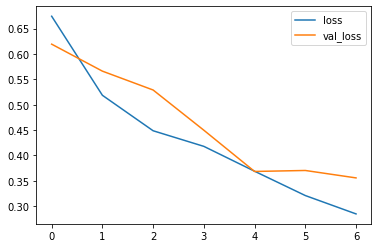

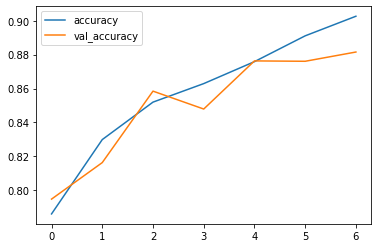

In [14]:
history_df = pd.DataFrame(history.history)

history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()


### Predict and validate model

In [15]:
y_pred = model.predict(X_test)


In [16]:
y_pred

array([[1.00000000e+00, 1.17839310e-12, 5.99511001e-13, ...,
        6.15980845e-13, 2.28826561e-13, 3.70037233e-30],
       [9.98370230e-01, 5.95042984e-05, 5.69334929e-07, ...,
        4.19709795e-06, 2.72511238e-06, 5.37404954e-10],
       [9.99999762e-01, 8.10537859e-10, 8.04227529e-09, ...,
        4.73706560e-11, 1.47369991e-13, 3.22905854e-24],
       ...,
       [9.99891162e-01, 2.46925151e-06, 7.69613871e-06, ...,
        8.69390760e-07, 3.02111118e-08, 4.39807427e-11],
       [1.60966709e-01, 2.33904182e-04, 6.30880913e-06, ...,
        1.00911304e-04, 4.56380218e-01, 5.65954736e-07],
       [1.00000000e+00, 7.43212505e-11, 2.01923330e-13, ...,
        4.72747655e-13, 1.51782428e-12, 9.47570629e-27]], dtype=float32)

In [17]:
predictions = [x.argmax() for x in y_pred]

In [18]:
real = [x.argmax() for x in y_test]

In [19]:
classes_wild = {0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal', \
                6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote', \
                12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat',\
                18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}
keys = [0, 1, 3, 4, 8, 10, 11, 13, 14, 16, 17, 18, 19, 22]
labels = [classes_wild[k] for k in keys]

In [20]:
pred = [classes_wild[x] for x in predictions]
true = [classes_wild[x] for x in real]

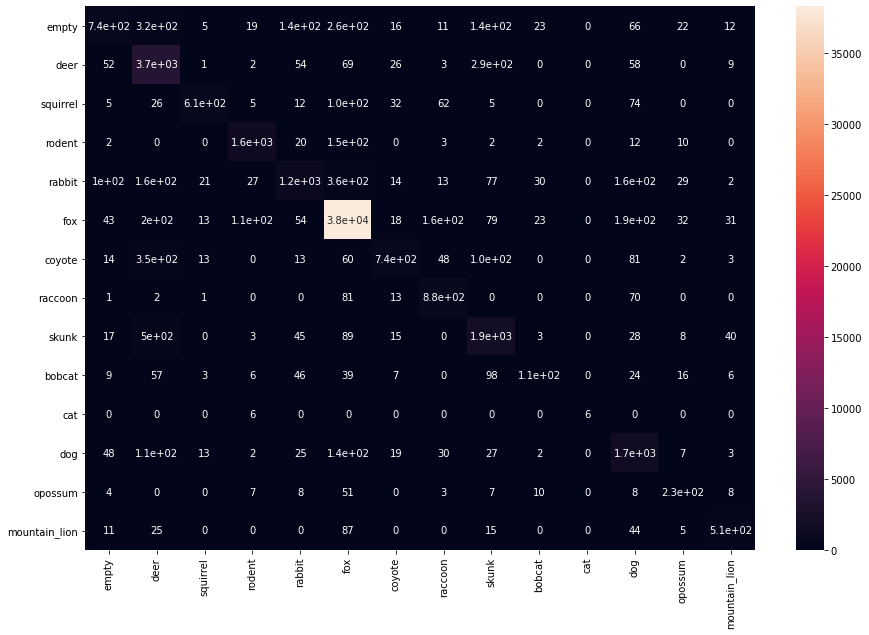

In [23]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(confusion_matrix(y_true=true, y_pred=pred),xticklabels=labels, yticklabels=labels, annot=True, ax=ax)
